# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who am I communicating to? What do I want them to understand? How can I use the data to make my point?

Dataset chosen, Group 32: Medicare Current Beneficiary Survey (MCBS)

WHO: Legislatures / politicians involved in healthcare policy and implementation
WHAT: Healthcare is a finanical burden on many Americans, and often this burden results in skipping care.
HOW: MCBS collects survey data from people on Medicare, many of the questions are related to cost and delayed care. 
Example categories are:
ACC_HCTRBMNY: Trouble getting needed health care because of cost/insufficient money
ACC_HCDELAY: Delay in healthcare in the past year due to cost
RXS_PDNOCVG: Has prescriptions not covered (increased OOP cost)
RXS_NOFILLRX: Did not fill a prescription due to cost
RXS_SKIPRX: Skipped doses to save money
ACW_MADVNOEM: Medicare Advantage refused to pay for emergency care
FIS_AFFDMEAL: Can’t afford balanced meals


# 3. Homework - work with your own data

In [1]:
# ! pip install pandas

In [2]:
# import sys
# sys.executable

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

Note to self: Would probably be helpful to add in a dictionary with all the columns I chose and what specifically they're measuring

Should also add in a statement explaining why I chose the columns I did - related to finances, delayed care, and demographics

Column_name;(Description);(Encodings)
PUF_ID;(Unique PUF Identification Number);()
ADM_H_MEDSTA;(Medicare status code as of 12/31);(1:Aged, 2:Disabled, 3:Unknown)
ADM_H_PHYEVT;(Total office visits in current yr (FFS));(0:No office visit, 1:1 to 5 office visits, 2:6 to 10 office visits, 3:11 to 15 office visits, 4:16 to 20 office visits, 5:21 or more office visits)
INS_PRIVRX;(Private plan covers Rx drugs (excl. RDS));(.:Inapplicable/Missing, 1:Yes, 2:No)
INS_PRIVLTC;(Private plan covers nursing home);(.:Inapplicable/Missing, 1:Yes, 2:No)
INS_PRIVVIS;(Private plan covers vision);(.:Inapplicable/Missing, 1:Yes, 2:No)
INS_PRIVDS;(Private plan covers dental);(.:Inapplicable/Missing, 1:Yes, 2:No)
INS_D_RDS;(Has Retiree Drug Subsidy (RDS));(1:Had RDS during year, 2:Never had RDS during year)
INS_MADVRXHT;(Medicare Advantage plan covers drugs);(.:Inapplicable/Missing, 1:Yes, 2:No)
DEM_AGE;(Age group);(1:Less than 65 years, 2:between 65-74 years. 3:75 years and older)
DEM_SEX;(Gender);(1:Male, 2:Female)
DEM_RACE;(Race/ethnicity group);(1:Non-Hispanic white, 2:Non-Hispanic black, 3:Hispanic, 4:Other)
DEM_EDU;(Highest grade completed);(.D:Don't know, .R:Refused, 1:Less than high school, 2:High school or vocational/technical/business, 3:More than high school)
DEM_MARSTA;(Marital status);(.D:Don't know, .R:Refused, 1:Married, 2:Widowed, 3:Divorced/separted, 4:Never married)
DEM_INCOME;(Income group);(1:Less than $25000, 2:Greater than or equal to $25000)
DEM_IPR_IND;(Income Poverty Ratio Medicare Threshold);(1:Less than the federal poverty level, 2:between 100-119% of the federal poverty level, 3:between 120-134% of the federal poverty level, 4: between 135-199% of the federal poverty level, 5: more than 200% of the federal poverty level)
ACC_HCTRBMNY;(Troub getting care: cost, insuff. money);(.D:don't know, .:Inapplicable/missing, 0:Not indicated, 1:Indicated)
ACC_HCDELAY;(Last year ever delay in care due to cost);(.D:Don't know, .R:Refused,.:Inapplicable/missing, 1:Yes, 2:No)
ACC_PAYPROB;(Problem paying medical bills);(.D:Don't know, .R:Refused,.:Inapplicable/missing, 1:Yes, 2:No)
ACC_PAYOVRTM;(Medical bills being paid off over time);(.D:Don't know, .:Inapplicable/missing, 1:Yes, 2:No)
ACC_MCCOSTS;(Satisfaction: OOP costs for med services);(.D:Don't know, .R:Refused,.:Inapplicable/missing, 1:Very satisfied, 2:Satisfied, 3:Dissatisfied, 4: Very Dissatisfied, 5: No experience)
ACC_MCDRSOON;(Usually go to Dr as soon as feel bad);(.D:Don't know, .R:Refused,.:Inapplicable/missing, 1:True, 2:False)
HLT_HYPEPAY;(Difficulty paying for BP meds);(.D:Don't know, .:Inapplicable/missing, 1:Yes, 2:No)
PRV_COLSCRNS;(Know Medicare help pay screening test);(.D:Don't know, .R:Refused,.:Inapplicable/missing, 1:Yes, 2:No)

In [4]:
# load the data
mcbs_fall = pd.read_csv("sfpuf2022_1_fall.csv", sep=",")
# mcbs_fall2022

# .info() and .describe()
# mcbs_fall2022.info()
# mcbs_fall.describe()

# to start working on it, I think I need to reduce the number of columns (currently there are over 300 columns)
# columns to keep: PUF_ID, ADM_H_MEDSTA, ADM_H_PHYEVT, INS_PRIVRX, INS_PRIVLTC, INS_PRIVVIS, INS_PRIVDS, INS_D_RDS, INS_MADVRXHT, DEM_AGE, DEM_SEX, DEM_RACE, DEM_EDU, DEM_MARSTA,
# DEM_INCOME, DEM_IPR_IND, ACC_HCTRBMNY, ACC_HCDELAY, ACC_PAYPROB, ACC_PAYOVRTM, ACC_MCCOSTS, ACC_MCDRSOON, HLT_HYPEPAY, PRV_COLSCRNS
mcbs_clean = mcbs_fall[["PUF_ID", "ADM_H_MEDSTA", "ADM_H_PHYEVT", "INS_PRIVRX", "INS_PRIVLTC", "INS_PRIVVIS", "INS_PRIVDS", "INS_D_RDS", "INS_MADVRXHT", "DEM_AGE","DEM_SEX", "DEM_RACE",
"DEM_EDU", "DEM_MARSTA", "DEM_INCOME", "DEM_IPR_IND", "ACC_HCTRBMNY", "ACC_HCDELAY", "ACC_PAYPROB", "ACC_PAYOVRTM", "ACC_MCCOSTS", "ACC_MCDRSOON", "HLT_HYPEPAY", "PRV_COLSCRNS"]]
# mcbs_clean.head(20)

# let's look at info and describe on this new df
# mcbs_clean.info()
# looks like we're primarily dealing with numbers (ints/floats), but there are some strings and objects (although isn't everything an object, technically?)
# just looking at the number of entries in each column, I can tell there's missing data - example: INS_PRIVRX has ~7k less entries than PUF_ID   
# mcbs_clean.describe()
# pretty obvious much of the data is one hot encoded just by looking at rows min - max (very little variation and all whole numbers)
# seeing again here that many columns have the same count (12,477), but there are a few from the same category with less (all have 5,647) - did these questions not apply to everyone, 
    # or did they either not ask / participants didn't answer?

# look for dups, does it make sense to keep them?
# mcbs_dup = mcbs_clean.duplicated()
# mcbs_dup.value_counts("True")
# Output is False 1.0, meaning 100% of the values are False, a.k.a no duplicates (row wise)!
# column wise, it would make sense for there to be duplicate answers, especially given that many of these are one hot encoded. there shouldn't be duplicates in the ID column though

# aggregate stats mean, median, mode
mcbs_mean = mcbs_clean.mean(numeric_only=True)
mcbs_median = mcbs_clean.median(numeric_only=True)
mcbs_mode = mcbs_clean.mode(numeric_only=True)
# print("Mean: ", mcbs_mean)
# print("Median: ", mcbs_median)
# print("Mode: ", mcbs_mode)
# I feel like I can't extract much meaning from these aggregates since much of the data is one hot encoded

# missing or null values? what do we do with them?
# mcbs_clean.isnull().sum()
# many columns don't have missing data, which is great
# missing data in the following columns: INS_PRIVRX, INS_PRIVLTC, INS_PRIVVIS, INS_PRIVDS, INS_MADVRXHT, ACC_HCTRBMNY, ACC_PAYOVRTM, ACC_MCCOSTS, ACC_MCDRSOON, HLT_HYPEPAY, PRV_COLSCRNS
# looks like for everyone they collected the demographic data, and the rest was a bit hit or miss
# I'd like to look at the columns with missing data
# mcbs_clean[mcbs_clean.isnull().any(axis=1)]
# looks like all the missing data was left blank (no place holders)
# to me, it doesn't make sense to delete the rows with missing data, seeing how many of them there are
# since this is a survey, it also doesn't make much sense to fill them in with the mean (especially as most of the answers are ints and a mean would likely be a float)
# I think my best option is to leave them be

# messy data?
# mcbs_clean.head(20)
# look at the min and max and make sure they're within the ranges of survey options
# mcbs_clean.min(numeric_only=True)
# mcbs_clean.max(numeric_only=True)
# nothing appears to be out of the range of possible answers

# one hot encoding
# looks like it already is one hot encoded


/tmp/ipykernel_2100/1244486801.py:2: DtypeWarning: Columns (0: DEM_MARSTA, 1: DEM_ARMED, 2: ACC_HCTROUBL, 3: ACC_HCTRBMNY, 4: ACC_HCDELAY, 5: ACC_PAYPROB, 6: ACC_PAYOVRTM, 7: ACC_MCAVOID, 8: HLT_OCARTERY, 9: HLT_OCMYOCAR, 10: HLT_OCHRTCND, 11: HLT_OCSTROKE, 12: HLT_OCCSKIN, 13: HLT_OCCANCER, 14: HLT_ALZDEM, 15: HLT_OCPSYCHO, 16: HLT_OCOSTEOP, 17: HLT_OCBRKHIP, 18: HLT_OCEMPHYS, 19: HLT_OCPPARAL, 20: HLT_HAVEPROS, 21: HLT_OCKIDNY, 22: HLT_OCBETES, 23: HLT_OCDVISIT, 24: HLT_SURGURIN, 25: HLT_HYPEHOME, 26: HLT_HYPEMEDS, 27: HLT_HYPEDRNK, 28: HLT_HYPEPAY, 29: HLT_HYPESKIP, 30: HLT_PROSSURG, 31: HLT_HELMTACT, 32: HLT_DIAINSUL, 33: HLT_DIAMEDS, 34: HLT_DIATENYR, 35: HLT_DIAHYPO, 36: HLT_DIAMNGE, 37: HLT_DISTEETH, 38: HLT_DISBATH, 39: HLT_DISERRND, 40: HLT_FOODTRBL, 41: HLT_DIFSTOOP, 42: HLT_DIFLIFT, 43: HLT_DIFWRITE, 44: HLT_DTBLGTPL, 45: HLT_DREDTRAV, 46: HLT_DASKRIDE, 47: HLT_DGIVUPDR, 48: HLT_DLIMDRIV, 49: HLT_DUSETRNS, 50: HLT_ECTROUB, 51: HLT_EDOCEXAM, 52: HLT_GLCOMEVR, 53: HLT_RETINEVR

Conclusions
1. Is the data good enough to use? Yes, there are plenty of rows and columns without missing data. Data is relatively clean already, some data is missing
2. Need to make any corrections in pre-processing? There aren't any duplicated rows, and with the knowledge I have it wouldn't be appropriate to fill in missing values. If needed, you could leave out the rows with missing data, but I personally would not do that.
3. Class imbalance amongst the columns? Yes, the columns beginning with "ins" and "acc" appear to be have thousands of rows with missing data whereas the demographic columns appear to be complete

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [5]:
# ! pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

References used:
1. https://seaborn.pydata.org/tutorial/introduction.html
2. https://seaborn.pydata.org/generated/seaborn.barplot.html
3. https://seaborn.pydata.org/tutorial/aesthetics.html
4. https://seaborn.pydata.org/tutorial/function_overview.html
5. https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html

Text(0.5, 1.0, 'Program Efficacy: How students feelings about science changed')

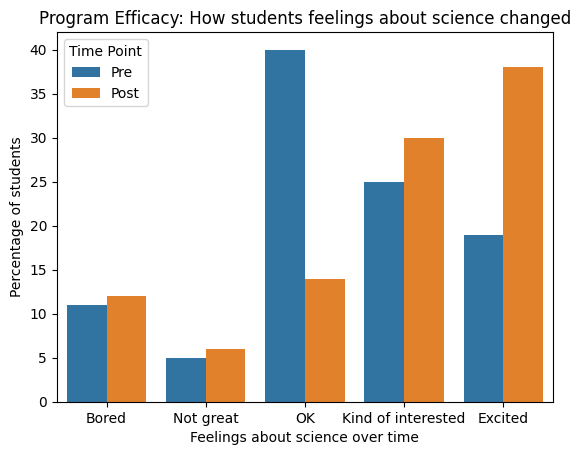

In [14]:
# separate the feeling names and feelings in the dataframe, can't use column names as the x
science_feelings = pd.DataFrame({
    "Feeling":["Bored", "Bored", "Not great", "Not great", "OK", "OK", "Kind of interested", "Kind of interested", "Excited", "Excited"],
    "Percentage":[11, 12, 5, 6, 40, 14, 25, 30, 19, 38],
    "Time Point":["Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post", "Pre", "Post"]
})
# check that it looks right
# science_feelings

# plot it
science_plot = sns.barplot(science_feelings, x="Feeling", y="Percentage", hue="Time Point")

# formatting
# labels and titles
plt.xlabel("Feelings about science over time")
plt.ylabel("Percentage of students")
plt.title("Program Efficacy: How students feelings about science changed")


In [7]:
# # I havent used seaborn before, want to attempt to make one with that
# # attempting the pilot program bar chart

# #  attempt 1 - not formatted correctly to use seaborn
# # start by making the df to plot off of
# # df_program = pd.DataFrame({
# #     "Bored":[11, 12],
# #     "Not great":[5, 6],
# #     "OK":[40,14],
# #     "Kind of interested":[25, 30],
# #     "Excited":[19,38]
# # })

# # #  check that it looks right
# # # df_program

# # # plot it now - thought the x and y would be labels, not the actual variables. need to format this differntly
# # sns.barplot(df_program, x="Feelings about science", y="Percentage of students with each feeling")

# # plot the pre and post feelings separately 
# # pre
# program_pre = pd.DataFrame({
#     "Bored":[11],
#     "Not great":[5],
#     "OK":[40],
#     "Kind of interested":[25]      ,
#     "Excited":[19]
# })
# # post
# program_post = pd.DataFrame({
#     "Bored":[12],
#     "Not great":[6],
#     "OK":[14],
#     "Kind of interested":[30],
#     "Excited":[38]
# })

# # check that they look right
# # program_pre
# # program_post

# # now try plotting again
# # sns.barplot()
# # seems like I actually do want them as one dataframe??

# # add in a column to each denoting the timeframe, then stack them together
# pre = ["Pre"]
# post = ["Post"]
# program_pre["Time"] = pre
# program_post["Time"] = post
# # check that they look right
# # program_pre
# # program_post

# #  now stack them
# program_all = pd.concat([program_pre, program_post], ignore_index=True)
# # program_all

# # try to plot it again
# # sns.barplot(program_all, x=)